# <b> Laboratório 8

Aluno: Rafael Mendes Campello

Referência: https://ecee.colorado.edu/~mathys/ecen4652/lab08/

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate
from importlib import reload
from Resources import comsig
import bisect
import ModuleLab1
import ModuleLab2
import ModuleLab4
import ModuleLab5
import ModuleLab6
import ModuleLab7
import ModuleLab8
reload(ModuleLab1)
reload(ModuleLab2)
reload(ModuleLab4)
reload(ModuleLab5)
reload(ModuleLab6)
reload(ModuleLab7)
reload(ModuleLab8)

<module 'ModuleLab8' from '/home/rcampello/Main/3m/Simulação de sistemas de comunicação/Labs/Lab8/ModuleLab8.py'>

# E1

## a

Implementação e teste conforme sugerido.

In [2]:
reload(ModuleLab8)

<module 'ModuleLab8' from '/home/rcampello/Main/3m/Simulação de sistemas de comunicação/Labs/Lab8/ModuleLab8.py'>

In [3]:
Fs = 44100
FB = 100
fc = 300
sig_an = comsig.sigSequ(np.random.randint(0, 2, 10), FB)

Para a transmissão coerente:

In [4]:
sig_xt, sig_st = ModuleLab8.askxmtr(sig_an, Fs, 'rect', [], 'coh', [fc, 0])

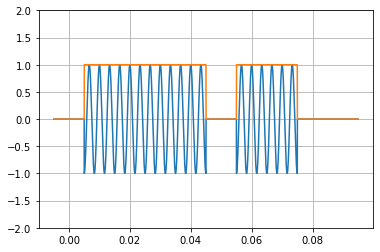

In [5]:
plt.ylim([-2, 2])
plt.grid()
plt.plot(sig_xt.timeAxis(), sig_xt.signal())
plt.plot(sig_st.timeAxis(), sig_st.signal())

Para a transmissão não-coerente:

In [6]:
sig_an = comsig.sigSequ([np.random.randint(0, 2, 10), 360 * np.random.rand(10)], FB)

In [7]:
sig_an.signal()

array([[  1.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   1.        ,   1.        ,
          0.        ,   1.        ],
       [300.01739323,  10.51237556, 253.83039419, 142.54633635,
        295.74973157, 213.28692267, 292.00089178, 142.8572507 ,
          3.50951514, 195.17623691]])

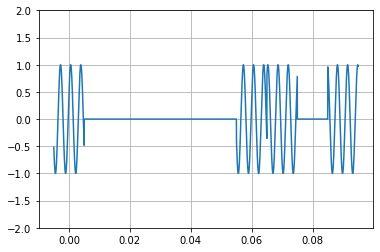

In [8]:
sig_xt, sig_st = ModuleLab8.askxmtr(sig_an, Fs, 'rect', [], 'noncoh', [fc])
plt.ylim([-2, 2])
plt.grid()
plt.plot(sig_xt.timeAxis(), sig_xt.signal())

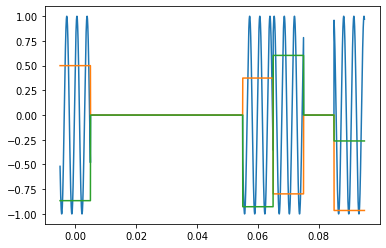

In [9]:
plt.plot(sig_xt.timeAxis(), sig_xt.signal())
plt.plot(sig_st.timeAxis(), sig_st.signal().real)
plt.plot(sig_st.timeAxis(), sig_st.signal().imag)

O comportamento é conforme o esperado. Para a transmissão coerente, não há derivada descontinua entre dois símbolos '1' consecutivos, na não-coerente, há.

## b

In [10]:
reload(ModuleLab8)

<module 'ModuleLab8' from '/home/rcampello/Main/3m/Simulação de sistemas de comunicação/Labs/Lab8/ModuleLab8.py'>

Para transmissão coerente:

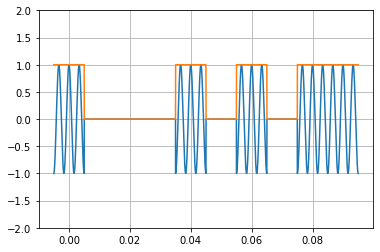

In [11]:
Fs = 44100
FB = 100
fc = 300
sig_an = comsig.sigSequ(np.random.randint(0, 2, 10), FB)


sig_xt, sig_st = ModuleLab8.askxmtr(sig_an, Fs, 'rect', [], 'coh', [fc, 0])
plt.ylim([-2, 2])
plt.grid()
plt.plot(sig_xt.timeAxis(), sig_xt.signal())
plt.plot(sig_st.timeAxis(), sig_st.signal())

In [12]:
sig_bn, sig_bt, sig_wt, ixn = ModuleLab8.askrcvr(sig_xt, 'coh', [fc, 0], [FB, 0], 'rect', [])

In [13]:
errors = sum(sig_an.signal() - sig_bn.signal() > 0.01)
print(errors)

0


O plot abaixo mostra o sinal recebido, o sinal PAM após o filtro casado e os instantes de amostragem. Acima vimos que a implementação do receptor consegue recuperar o sinal.

<StemContainer object of 3 artists>

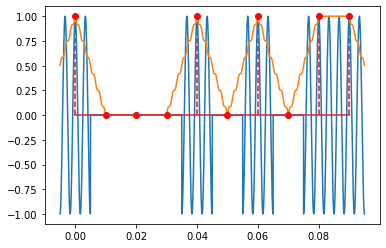

In [14]:
plt.plot(sig_xt.timeAxis(), sig_xt.signal())
plt.plot(sig_bt.timeAxis(), sig_bt.signal())
plt.stem(sig_bt.timeAxis()[ixn], sig_bt.signal()[ixn], linefmt="r--", markerfmt="ro")

Para transmissão não-coerente:

In [15]:
sig_an = comsig.sigSequ([np.random.randint(0, 2, 10), 360 * np.random.rand(10)], FB)

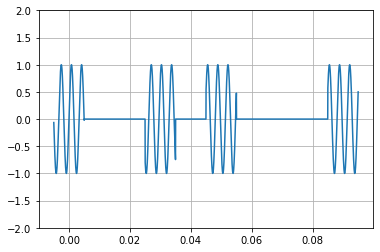

In [16]:
sig_xt, sig_st = ModuleLab8.askxmtr(sig_an, Fs, 'rect', [], 'noncoh', [fc])
plt.ylim([-2, 2])
plt.grid()
plt.plot(sig_xt.timeAxis(), sig_xt.signal())

In [17]:
sig_bn, sig_bt, sig_wt, ixn = ModuleLab8.askrcvr(sig_xt, 'noncoh', [fc], [FB, 0.0], 'rect', [])

In [18]:
errors = sum(sig_an.signal()[0] - sig_bn.signal() > 0.01)
print(errors)

0


<StemContainer object of 3 artists>

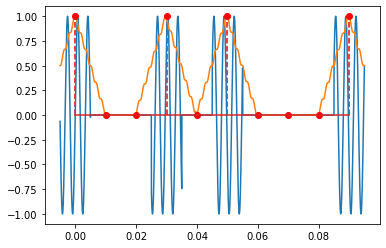

In [19]:
plt.plot(sig_xt.timeAxis(), sig_xt.signal())
plt.plot(sig_bt.timeAxis(), sig_bt.signal())
plt.stem(sig_bt.timeAxis()[ixn], sig_bt.signal()[ixn], linefmt="r--", markerfmt="ro")

Novamente, o receptor consegue decodificar sem erros.

## c

In [20]:
Fs = 44100
FB = 100
fc = 2100
sig_an = comsig.sigSequ(np.random.randint(0, 2, FB * 2), FB)

### i) OOK coerente

#### Pulso rect

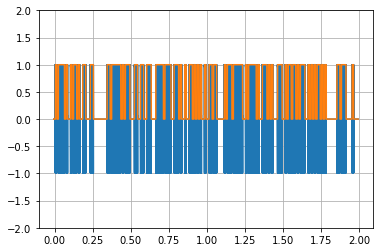

In [21]:
sig_xt, sig_st = ModuleLab8.askxmtr(sig_an, Fs, 'rect', [], 'coh', [fc, 0])
plt.ylim([-2, 2])
plt.grid()
plt.plot(sig_xt.timeAxis(), sig_xt.signal())
plt.plot(sig_st.timeAxis(), sig_st.signal())

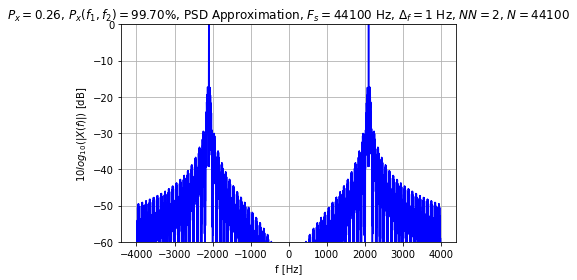

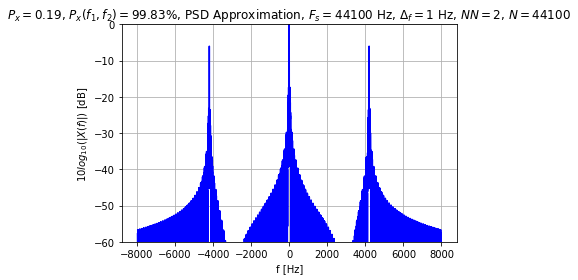

In [22]:
_, _ = ModuleLab5.showpsd(sig_xt, [-4000, 4000, -60], Fs)
_, _ = ModuleLab5.showpsd(sig_xt.pwrx(2), [-8000, 8000, -60], Fs)

OBS: Embora o gráfico acima pareça diferente do fornecido no material teórico, os parâmetros são diferentes ($f_c$), que modifica a PSD.

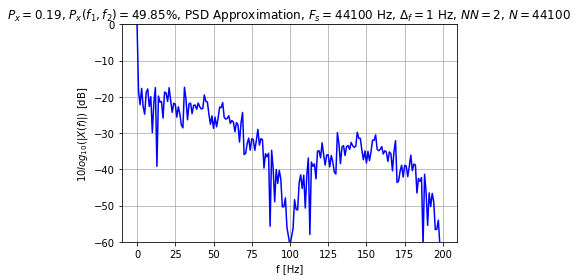

In [23]:
_, _ = ModuleLab5.showpsd(sig_xt.pwrx(2), [0, 200, -60], Fs)

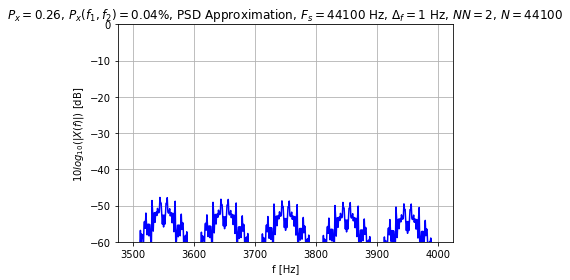

In [24]:
_, _ = ModuleLab5.showpsd(sig_xt, [3500, 4000, -60], Fs)

Neste caso, podemos encontrar o $F_B$ olhando para os zeros da PSD

In [25]:
sig_bn, sig_bt, sig_wt, ixn = ModuleLab8.askrcvr(sig_xt, 'coh', [fc, 0], [FB, 0], 'rect', [])
wn = sig_wt.signal()[ixn]

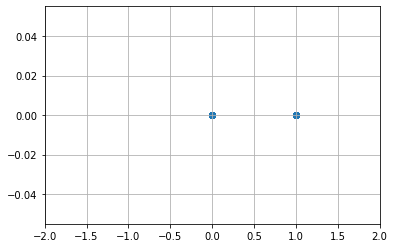

In [26]:
plt.xlim([-2, 2])
plt.grid()
plt.scatter(wn.real, wn.imag)

### Pulse tri

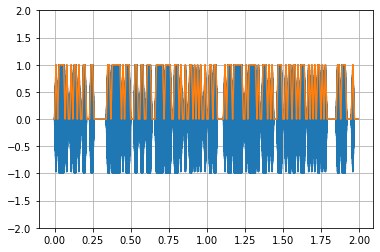

In [27]:
sig_xt, sig_st = ModuleLab8.askxmtr(sig_an, Fs, 'tri', [], 'coh', [fc, 0])
plt.ylim([-2, 2])
plt.grid()
plt.plot(sig_xt.timeAxis(), sig_xt.signal())
plt.plot(sig_st.timeAxis(), sig_st.signal())

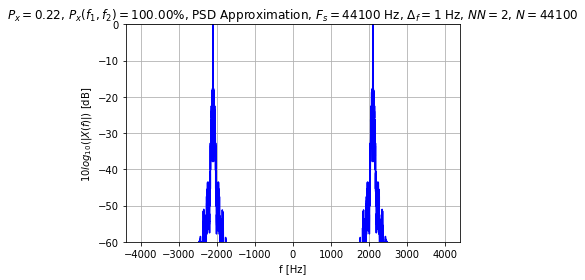

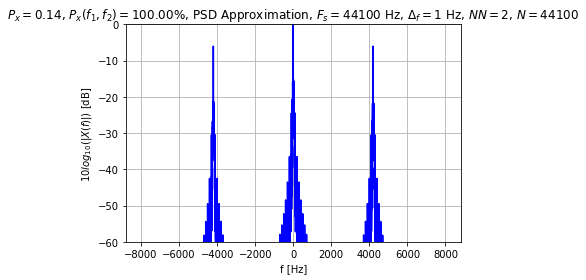

In [28]:
_, _ = ModuleLab5.showpsd(sig_xt, [-4000, 4000, -60], Fs)
_, _ = ModuleLab5.showpsd(sig_xt.pwrx(2), [-8000, 8000, -60], Fs)

Claramente o uso de banda diminuiu comparado ao OOK coerente com pulso retangular.

In [29]:
sig_bn, sig_bt, sig_wt, ixn = ModuleLab8.askrcvr(sig_xt, 'coh', [fc, 0], [FB, 0], 'tri', [])
wn = sig_wt.signal()[ixn]

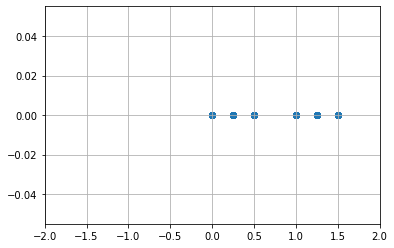

In [30]:
plt.xlim([-2, 2])
plt.grid()
plt.scatter(wn.real, wn.imag)

### ii) OOK Não-coerente

In [31]:
sig_an = comsig.sigSequ([np.random.randint(0, 2, FB * 2), 360 * np.random.rand(FB * 2)], FB)

#### Pulso rect

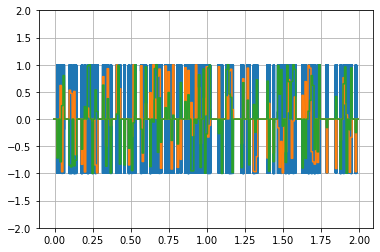

In [32]:
sig_xt, sig_st = ModuleLab8.askxmtr(sig_an, Fs, 'rect', [], 'noncoh', [fc])
plt.ylim([-2, 2])
plt.grid()
plt.plot(sig_xt.timeAxis(), sig_xt.signal())
plt.plot(sig_st.timeAxis(), sig_st.signal().real)
plt.plot(sig_st.timeAxis(), sig_st.signal().imag)

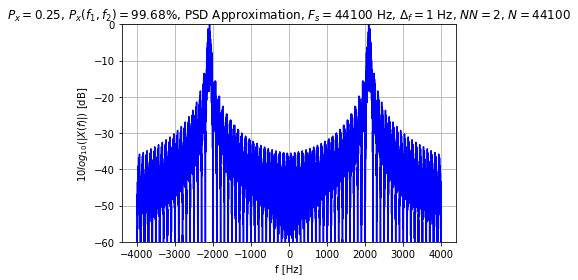

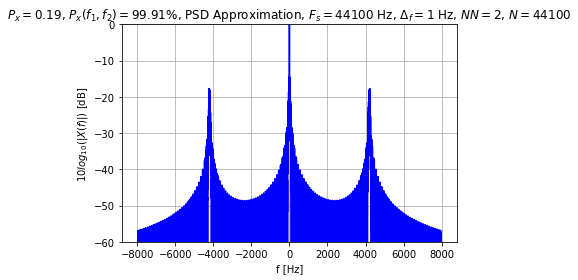

In [33]:
_, _ = ModuleLab5.showpsd(sig_xt, [-4000, 4000, -60], Fs)
_, _ = ModuleLab5.showpsd(sig_xt.pwrx(2), [-8000, 8000, -60], Fs)

In [34]:
sig_bn, sig_bt, sig_wt, ixn = ModuleLab8.askrcvr(sig_xt, 'noncoh', [fc, 0], [FB, 0.0], 'rect', [])
wn = sig_wt.signal()[ixn]

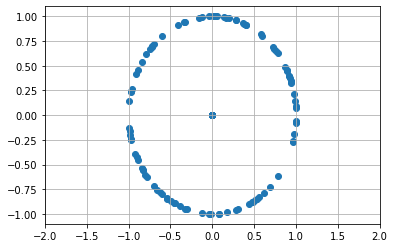

In [35]:
plt.xlim([-2, 2])
plt.grid()
plt.scatter(wn.real, wn.imag)

Temos um maior uso de banda devido às transições frequentes e o plot da constelação "gira" devido a fase aleatória, o ponto na origem indica a transmissão dos símbolos zero.

#### Pulso tri

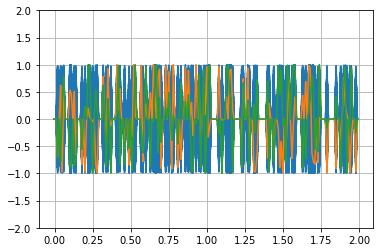

In [36]:
sig_xt, sig_st = ModuleLab8.askxmtr(sig_an, Fs, 'tri', [], 'noncoh', [fc])
plt.ylim([-2, 2])
plt.grid()
plt.plot(sig_xt.timeAxis(), sig_xt.signal())
plt.plot(sig_st.timeAxis(), sig_st.signal().real)
plt.plot(sig_st.timeAxis(), sig_st.signal().imag)

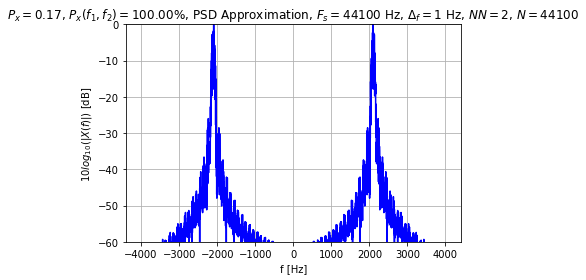

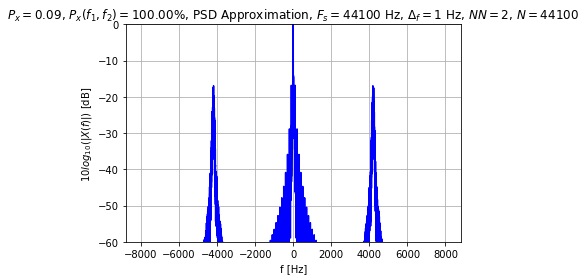

In [37]:
_, _ = ModuleLab5.showpsd(sig_xt, [-4000, 4000, -60], Fs)
_, _ = ModuleLab5.showpsd(sig_xt.pwrx(2), [-8000, 8000, -60], Fs)

In [38]:
sig_bn, sig_bt, sig_wt, ixn = ModuleLab8.askrcvr(sig_xt, 'noncoh', [fc, 0], [FB, 0.0], 'tri', [])
wn = sig_wt.signal()[ixn]

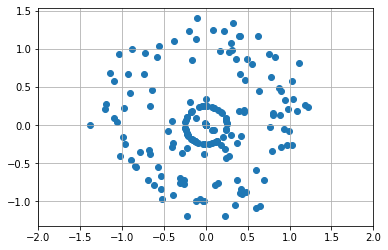

In [39]:
plt.xlim([-2, 2])
plt.grid()
plt.scatter(wn.real, wn.imag)

Novamente, a banda é reduzida pelo uso do pulso triangular e temos uma rotação da constelação.

### iii) BPSK

#### Pulso rect

In [40]:
vec = np.random.randint(0, 2, FB * 2)
sig_an = comsig.sigSequ(1 - 2 * vec, FB)

In [41]:
sig_xt, sig_st = ModuleLab8.askxmtr(sig_an, Fs, 'rect', [], 'coh', [fc, 0])

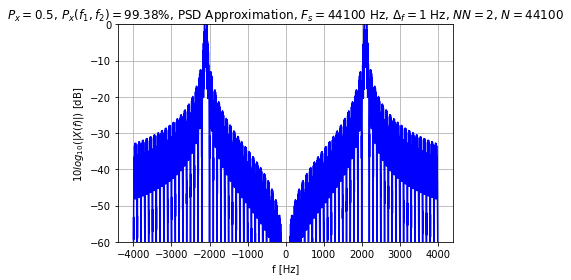

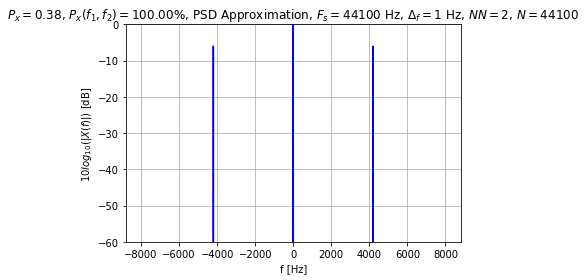

In [42]:
_, _ = ModuleLab5.showpsd(sig_xt, [-4000, 4000, -60], Fs)
_, _ = ModuleLab5.showpsd(sig_xt.pwrx(2), [-8000, 8000, -60], Fs)

In [43]:
sig_bn, sig_bt, sig_wt, ixn = ModuleLab8.askrcvr(sig_xt, 'coh', [fc, 0], [FB, 0], 'rect', [])
wn = sig_wt.signal()[ixn]

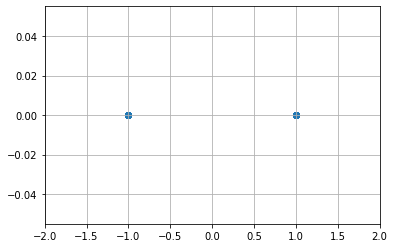

In [44]:
plt.xlim([-2, 2])
plt.grid()
plt.scatter(wn.real, wn.imag)

#### Pulso tri

In [45]:
sig_xt, sig_st = ModuleLab8.askxmtr(sig_an, Fs, 'tri', [], 'coh', [fc, 0])

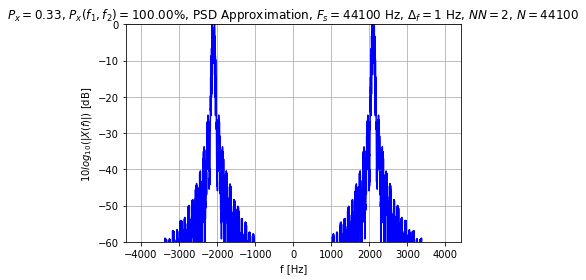

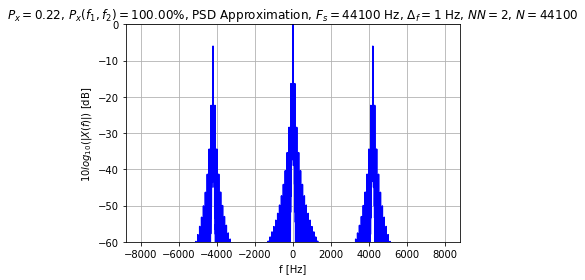

In [46]:
_, _ = ModuleLab5.showpsd(sig_xt, [-4000, 4000, -60], Fs)
_, _ = ModuleLab5.showpsd(sig_xt.pwrx(2), [-8000, 8000, -60], Fs)

In [47]:
sig_bn, sig_bt, sig_wt, ixn = ModuleLab8.askrcvr(sig_xt, 'coh', [fc, 0], [FB, 0], 'tri', [])
wn = sig_wt.signal()[ixn]

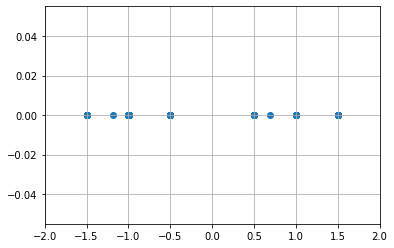

In [48]:
plt.xlim([-2, 2])
plt.grid()
plt.scatter(wn.real, wn.imag)

De maneira análoga aos resultados anteriores, a aplicação do pulso triangular faz com que apareçam pontos "intermediários" com relação à constelação em que é utilizada o pulso retangular.

## d

Como sempre, usamos a PSD para obter informações relevantes a respeito do sinal: $f_c$ e $F_B$.

### asksig801.wav

In [49]:
Fs, rt = ModuleLab1.wavread("Files/asksig801.wav")

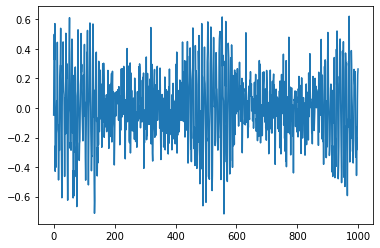

In [50]:
plt.plot(rt[:1000])

In [51]:
sig = comsig.sigWave(rt, Fs)

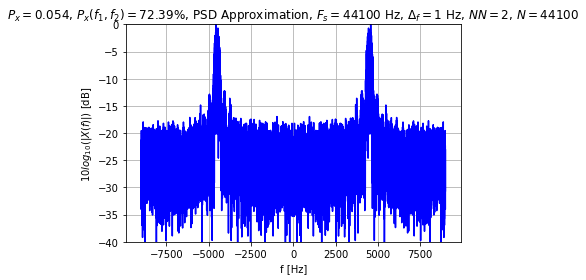

In [52]:
B = 9000
_ , _ = ModuleLab5.showpsd(sig, [-B, B, -40], Fs)

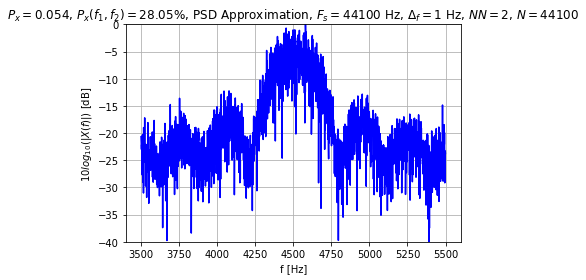

In [53]:
_ , _ = ModuleLab5.showpsd(sig, [3500, 5500, -40], Fs)

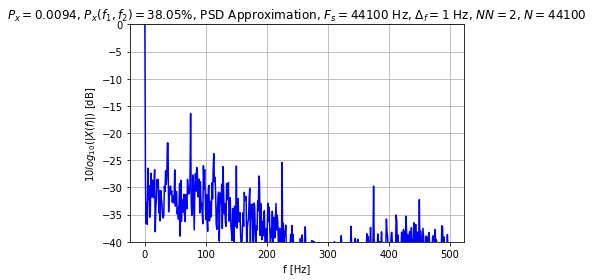

In [54]:
_ , _ = ModuleLab5.showpsd(sig.pwrx(2), [0, 500, -40], Fs)

In [55]:
sig_bn, sig_bt, sig_wt, ixn = ModuleLab8.askrcvr(sig, 'noncoh', [4500], [300, 0.5], 'tri', [])

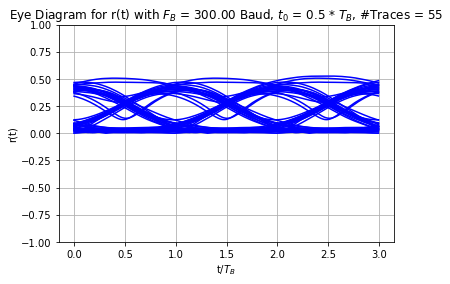

In [56]:
ModuleLab4.showeye(sig_bt, 300, 55, [0.5, 3, -1, 1])

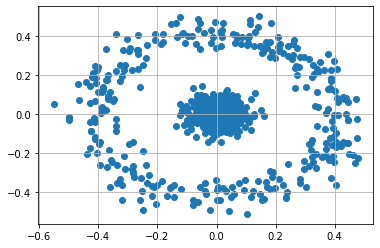

In [57]:
wn = sig_wt.signal()[ixn]
plt.grid()
plt.scatter(wn.real, wn.imag)

(array([179., 206.,  30.,   1.,   0.,   4.,  77., 141.,  71.,  19.]),
 array([0.00210363, 0.05721179, 0.11231995, 0.16742811, 0.22253627,
        0.27764443, 0.33275259, 0.38786075, 0.44296891, 0.49807707,
        0.55318523]),
 <BarContainer object of 10 artists>)

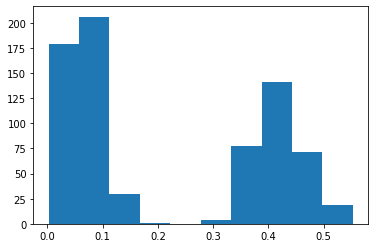

In [58]:
plt.hist(sig_bn.signal())

In [59]:
ModuleLab1.bin2asc(np.where(sig_bn.signal() > 0.2, 1, 0), flg = 0)

'If the Secret Service finds shredded paper in your trash, they WILL piece it back together!'

### asksig802.wav

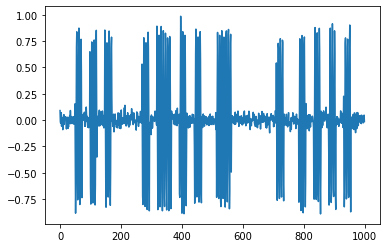

In [60]:
Fs, rt = ModuleLab1.wavread("Files/asksig802.wav")
plt.plot(rt[:1000])
sig = comsig.sigWave(rt, Fs)

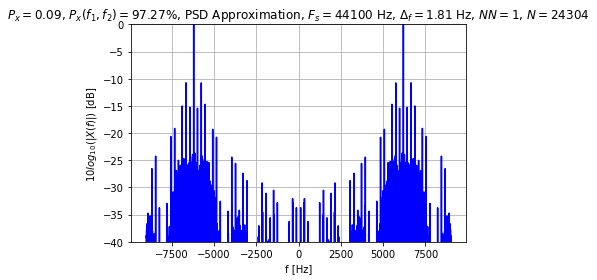

In [61]:
B = 9000
_ , _ = ModuleLab5.showpsd(sig, [-B, B, -40], Fs)

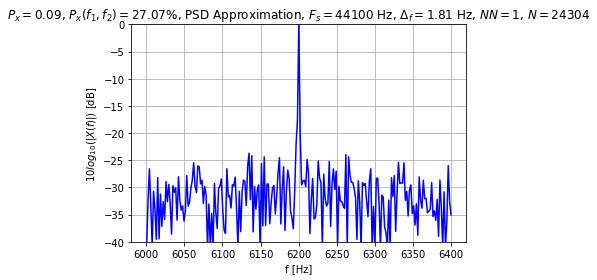

In [62]:
_ , _ = ModuleLab5.showpsd(sig, [6000, 6400, -40], Fs)

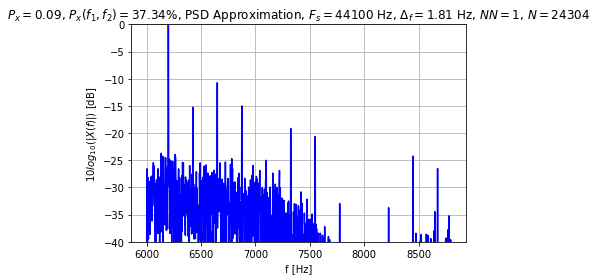

In [63]:
_ , _ = ModuleLab5.showpsd(sig, [6000, 8800, -40], Fs)

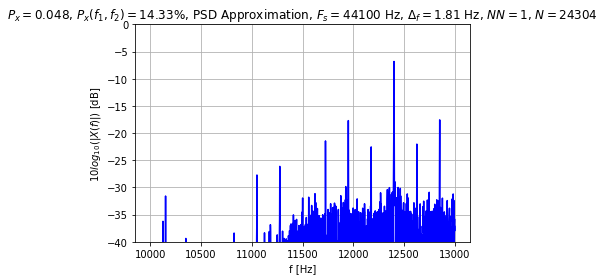

In [64]:
_ , _ = ModuleLab5.showpsd(sig.pwrx(2), [10000, 13000, -40], Fs)

(array([526.,   5.,   0.,   0.,   0.,   0.,   0.,   0.,  49., 412.]),
 array([0.00123024, 0.08821993, 0.17520963, 0.26219932, 0.34918901,
        0.43617871, 0.5231684 , 0.6101581 , 0.69714779, 0.78413749,
        0.87112718]),
 <BarContainer object of 10 artists>)

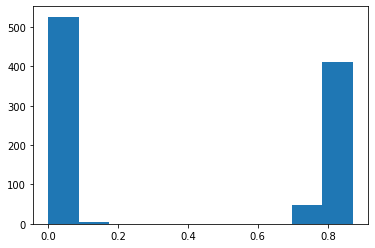

In [65]:
sig_bn,sig_bt,sig_wt,ixn = ModuleLab8.askrcvr(sig, 'noncoh', [6200], [1800, 0.5], 'rect', [])
plt.hist(sig_bn.signal())

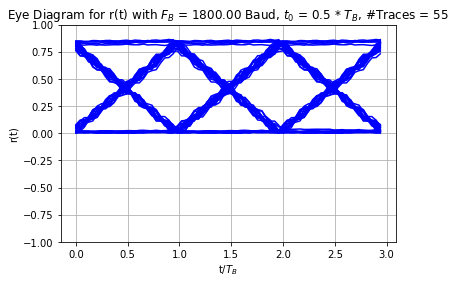

In [66]:
ModuleLab4.showeye(sig_bt, 1800, 55, [0.5, 3, -1, 1])

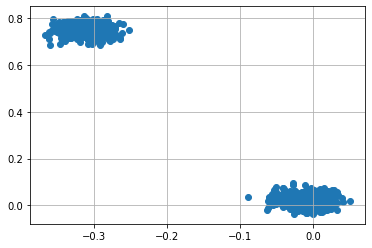

In [67]:
wn = sig_wt.signal()[ixn]
plt.grid()
plt.scatter(wn.real, wn.imag)

O sinal é coerente, mas como há muito pouco ruído, podemos usar a decodificação não-coerente.

In [68]:
sig_bn.signal().size / 8

124.0

Como sabemos que a quantidade de bits transmitda tem que ser múltipla de 8, podemos fazer o fine-tunning de $F_B$ ao escolher valores que façam com que $ \texttt{sig_bn.signal().size} $ seja divisível por 8.

In [69]:
ans = ModuleLab1.bin2asc(np.where(sig_bn.signal() > 0.2, 1, 0), flg = 0)
print(ans)

The United States is number one in cosmetics spending, yet ranked number 23 on the world's "satisfaction with life" ranking.


### asksig803.wav

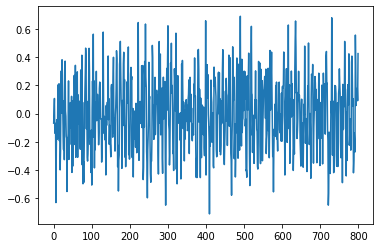

In [70]:
Fs, rt = ModuleLab1.wavread("Files/asksig803.wav")
plt.plot(rt[5000:5000 + 800])
sig = comsig.sigWave(rt, Fs)

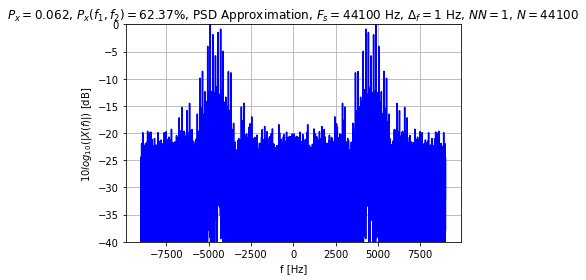

In [71]:
B = 9000
_ , _ = ModuleLab5.showpsd(sig, [-B, B, -40], Fs)

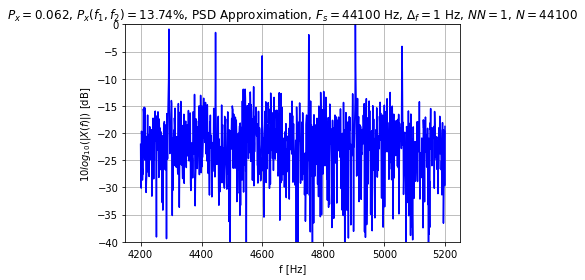

In [72]:
_ , _ = ModuleLab5.showpsd(sig, [4200, 5200, -40], Fs)

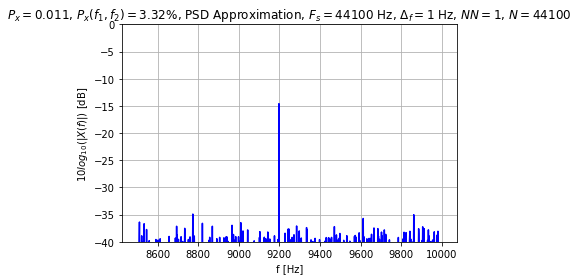

In [73]:
ff, sx = ModuleLab5.showpsd(sig.pwrx(2), [8500, 10000, -40], Fs)

In [74]:
def getmxidx(ff, sx, lb=0, ub=99999999):
    ret = -1
    mx = -99999999999
    for i in range(len(ff)):
        if ff[i] >= lb and ff[i] <= ub:
            if sx[i] > mx:
                mx = sx[i]
                ret = ff[i]
    return ret

In [75]:
getmxidx(ff, sx, 8600) / 2

4599.0

Como o sinal possui muito ruído, é desejável usar decodificação coerente.

In [76]:
for FB in np.arange(500, 2000, 5):
    sig_bn, sig_bt, sig_wt, ixn = ModuleLab8.askrcvr(sig, 'coh', [4599, 0], [1225, 0.5], 'rect', [])

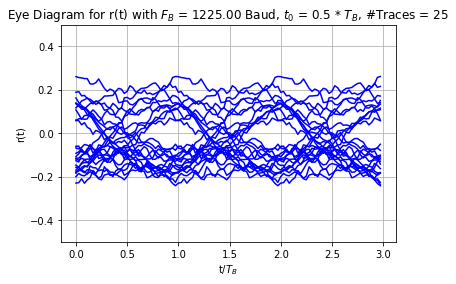

In [77]:
sig_bn, sig_bt, sig_wt, ixn = ModuleLab8.askrcvr(sig, 'coh', [4599, 0], [1225, 0.5], 'rect', [])
ModuleLab4.showeye(sig_bt, 1225, 25, [0.5, 3, -0.5, 0.5])

(array([ 24., 308., 627., 314.,  31.,  24., 220., 524., 289.,  23.]),
 array([-0.31560052, -0.25318434, -0.19076816, -0.12835199, -0.06593581,
        -0.00351963,  0.05889654,  0.12131272,  0.1837289 ,  0.24614508,
         0.30856125]),
 <BarContainer object of 10 artists>)

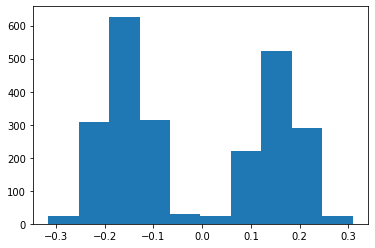

In [78]:
plt.hist(sig_bn.signal())

In [79]:
TH = 0
ans = ModuleLab1.bin2asc(np.where(sig_bn.signal() < TH, 0, 1), flg = 0)
print(ans)

L'adaptabilite est le secret de la survie. Selon Charles Darwin, ni le plus fort ni le plus intelligent mais seulement les especes les plus adaptables gagne a la fin. Alors faites de votre mieux pour etre le plus adaptable, dans votre vie personnelle autant que dans les relations professionnelles.


## e

Inicialmente, montamos o esquemático fornecido e verificamos o resultado dado na parte teórica do material.

<img src="Prints/E1E-1.png">
<img src="Prints/E1E-2.png">

Os primeiros testes são: Aumentar o ruído com o $A_n$ e o erro de frequência entre transmissor e receptor $f_e$.

Para o primeiro, temos erros de decodificação ao aumentar o ruído.

Para o segundo, a constelação azul começa a girar (podemos intepretar a grandeza frequência como derivada da fase, se temos um erro constante de frequência, isso se traduz numa rotação constante da fase). Para pequenas diferenças, o receptor implementa algum tipo de malha fechada (loop, como o loop de Costas) para corrigir esse tipo de erro e decodificar corretamente.

<img src="Prints/E1E-3.png">
<img src="Prints/E1E-4.png">

Mudando a variável $G$, controlamos a distância à origem dos pontos da constelação, no entanto, como a aplicação do ruído é feita antes desse escalonamento, aumentar o $G$ também aumenta o ruído (nesta implementação).

A variação de $\theta_1$ e $\theta_2$ controla o termo constante da diferença de fase entre o receptor e transmitor, se utilizamos um defasamento de 180 graus, o mapeamento é invertido e não conseguimos decodificar já que a informação está na fase. No entanto, isso também serve para ilustrar que não existe (ou não precisa existir) um referência absoluta para as fases do transmissor e receptor, mesmo que a modulação seja uma em que a informação está contida na fase. A ambiguidade pode ser solucionada, como o uso de codificação diferencial ou uso de um prefixo conhecido.

<img src="Prints/E1E-5.png">
<img src="Prints/E1E-6.png">
<img src="Prints/E1E-7.png">

## f

Montamos o esquemático fornecido no material, substituindo o "RTL-SOURCE" pelo "File Source".

<img src="Prints/E1F-1.png">
<img src="Prints/E1F-2.png">

# E2

In [80]:
reload(ModuleLab8)

<module 'ModuleLab8' from '/home/rcampello/Main/3m/Simulação de sistemas de comunicação/Labs/Lab8/ModuleLab8.py'>

## a

Implementação + testes sugeridos.

Primeiro testamos os dois sinais coerentes do material teórico.

In [81]:
data = np.array([0, 1, 1, 1, 0, 0, 1, 0])
dn = comsig.sigSequ(data, FB = 100)

In [82]:
sig_xt1 = ModuleLab8.fskxmtr(M = 2, sig_dn = dn, Fs = 44100, ptype = 'rect', pparms = [], xtype = 'coh', fcparms = [[300, 400], [-90, -90]])

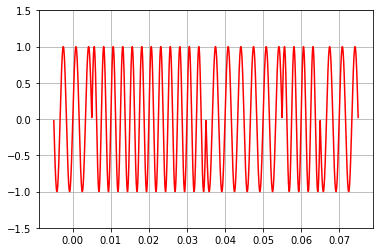

In [83]:
plt.ylim([-1.5, 1.5])
plt.grid()
plt.plot(sig_xt1.timeAxis(), sig_xt1.signal(), color = "red")

Para o sinal CPSK (pág 12)

In [84]:
sig_xt2 = ModuleLab8.fskxmtr(M = 2, sig_dn = dn, Fs = 44100, ptype = 'rect', pparms = [], xtype = 'coh', fcparms = [[300, 400], [90, -90]])

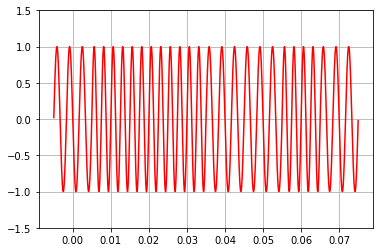

In [85]:
plt.ylim([-1.5, 1.5])
plt.grid()
plt.plot(sig_xt2.timeAxis(), sig_xt2.signal(), color = "red")

In [86]:
sig_xt3 = ModuleLab8.fskxmtr(M = 2, sig_dn = dn, Fs = 44100, ptype = 'rect', pparms = [], xtype = 'noncoh', fcparms = [300, 400])

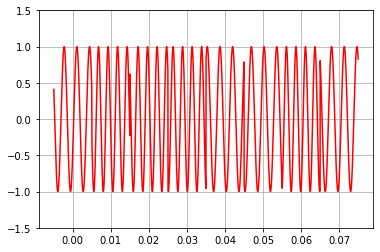

In [87]:
plt.ylim([-1.5, 1.5])
plt.grid()
plt.plot(sig_xt3.timeAxis(), sig_xt3.signal(), color = "red")

O sinal não coerente possui uma componente de aleatoriedade, então não vemos necessariamente um gráfico idêntico ao da introdução se usarmos a versão da documentação. Usamos a sugestão de definir os thetas conforme dado, dessa forma conseguimos reproduzir a gráfico dado na introdução.

In [88]:
sig_xt3 = ModuleLab8.fskxmtr(M = 2, sig_dn = dn, Fs = 44100, ptype = 'rect', pparms = [], xtype = 'fixed_noncoh', fcparms = [[300, 400], [270, 225, 4, 135, 250, 90, 40, 240]])

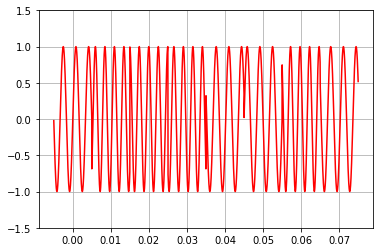

In [89]:
plt.ylim([-1.5, 1.5])
plt.grid()
plt.plot(sig_xt3.timeAxis(), sig_xt3.signal(), color = "red")

## b

In [90]:
reload(ModuleLab8)

<module 'ModuleLab8' from '/home/rcampello/Main/3m/Simulação de sistemas de comunicação/Labs/Lab8/ModuleLab8.py'>

Utilizamos os sinais gerados na letra $\textit{a}$ e confirmamos que conseguimos recuperá-los.

In [91]:
sig_bn, sig_wt, ixn = ModuleLab8.fskrcvr(2, sig_xt1, 'coh', [[300, 400], [-90, -90]], [100, 0.0], 'rect', [])

In [92]:
np.array_equal(sig_bn.signal(), dn.signal())

True

In [93]:
sig_bn, sig_wt, ixn = ModuleLab8.fskrcvr(2, sig_xt2, 'coh', [[300, 400], [90, -90]], [100, 0.0], 'rect', [])

In [94]:
np.array_equal(sig_bn.signal(), dn.signal())

True

In [95]:
sig_bn, sig_wt, ixn = ModuleLab8.fskrcvr(2, sig_xt3, 'noncoh', [300, 400], [100, 0.0], 'rect', [])

In [96]:
np.array_equal(sig_bn.signal(), dn.signal())

True

## c

In [97]:
reload(ModuleLab8)

<module 'ModuleLab8' from '/home/rcampello/Main/3m/Simulação de sistemas de comunicação/Labs/Lab8/ModuleLab8.py'>

In [98]:
data = np.random.randint(0, 2, size = 500)
dnc = comsig.sigSequ(data, FB = 100)

fc0, fc1 = 300, 400
theta0, theta1 = 0, 0
FB = 100

/home/rcampello/Main/3m/Simulação de sistemas de comunicação/Labs/.venv/lib/python3.9/site-packages/matplotlib/collections.py:206: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


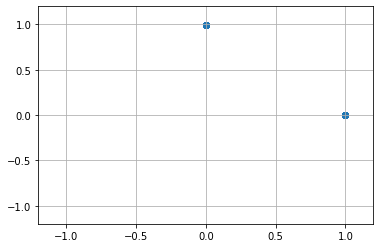

In [99]:
sig_xt = ModuleLab8.fskxmtr(M = 2, sig_dn = dnc, Fs = 44100, ptype = 'rect', pparms = [], xtype = 'coh', fcparms = [[fc0, fc1], [theta0, theta1]])
sig_bn, sig_wt, ixn = ModuleLab8.fskrcvr(2, sig_xt, 'coh', [[fc0, fc1], [theta0, theta1]], [FB, 0.0], 'rect', [])
scale = 1.2
plt.ylim([-scale, scale])
plt.xlim([-scale, scale])
plt.grid()
plt.scatter(sig_wt.signal()[0][ixn], sig_wt.signal()[1][ixn])

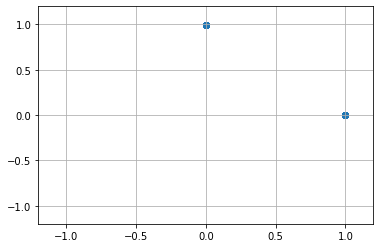

In [100]:
theta0, theta1 = 0, 180

sig_xt = ModuleLab8.fskxmtr(M = 2, sig_dn = dnc, Fs = 44100, ptype = 'rect', pparms = [], xtype = 'coh', fcparms = [[fc0, fc1], [theta0, theta1]])
sig_bn, sig_wt, ixn = ModuleLab8.fskrcvr(2, sig_xt, 'coh', [[fc0, fc1], [theta0, theta1]], [FB, 0.0], 'rect', [])
scale = 1.2
plt.ylim([-scale, scale])
plt.xlim([-scale, scale])
plt.grid()
plt.scatter(sig_wt.signal()[0][ixn], sig_wt.signal()[1][ixn])

Os sinais permanecem ortogonais

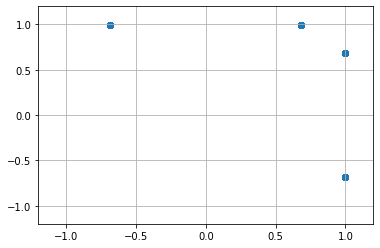

In [101]:
fc0, fc1 = 300, 350
theta0, theta1 = 0, 180
FB = 100

sig_xt = ModuleLab8.fskxmtr(M = 2, sig_dn = dnc, Fs = 44100, ptype = 'rect', pparms = [], xtype = 'coh', fcparms = [[fc0, fc1], [theta0, theta1]])
sig_bn, sig_wt, ixn = ModuleLab8.fskrcvr(2, sig_xt, 'coh', [[fc0, fc1], [theta0, theta1]], [FB, 0.0], 'rect', [])
scale = 1.2
plt.ylim([-scale, scale])
plt.xlim([-scale, scale])
plt.grid()
plt.scatter(sig_wt.signal()[0][ixn], sig_wt.signal()[1][ixn])

Não é possível reduzir $\Delta f$ para menos que $F_B$, precisamos usar múltiplos de $F_B$, por exemplo $f_{c1}$ = 500 Hz mantém a ortogonalidade.

É importante notar que não basta usar $\Delta f = k F_B, k \in \mathbb{Z}$, também temos que fazer com que $f_{cm}$ seja múltiplo de $F_B$.

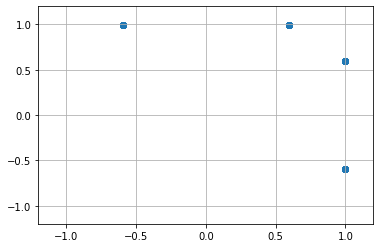

In [102]:
fc1, fc2 = 350, 400
theta1, theta2 = 0, 180
FB = 100

sig_xt = ModuleLab8.fskxmtr(M = 2, sig_dn = dnc, Fs = 44100, ptype = 'rect', pparms = [], xtype = 'coh', fcparms = [[fc1, fc2], [theta1, theta2]])
sig_bn, sig_wt, ixn = ModuleLab8.fskrcvr(2, sig_xt, 'coh', [[fc1, fc2], [theta1, theta2]], [FB, 0.0], 'rect', [])
scale = 1.2
plt.ylim([-scale, scale])
plt.xlim([-scale, scale])
plt.grid()
plt.scatter(sig_wt.signal()[0][ixn], sig_wt.signal()[1][ixn])

Podemos confirmar os resultados por meio da definição:

In [103]:
def check_orto(FB, f0, f1, theta0, theta1):
    def f(x):
        return np.cos(2 * np.pi * f0 * x + theta0 * np.pi / 180) * np.cos(2 * np.pi * f1 * x + theta1 * np.pi / 180)
    
    for n in range(-30, 30):
        res = integrate.quad(f, (n - 0.5) / FB, (n + 0.5) / FB)
        if res[0] > 1e-9:
            return False
    return True

In [104]:
print(check_orto(FB = 100, f0 = 300, f1 = 400, theta0 = 0, theta1 = 0))
print(check_orto(FB = 100, f0 = 300, f1 = 350, theta0 = 0, theta1 = 0))
print(check_orto(FB = 100, f0 = 300, f1 = 350, theta0 = 0, theta1 = 180))
print(check_orto(FB = 100, f0 = 300, f1 = 400, theta0 = 0, theta1 = 180))
print(check_orto(FB = 100, f0 = 300, f1 = 400, theta0 = 0, theta1 = 180))

True
False
False
True
True


In [105]:
print(check_orto(FB = 100, f0 = 300, f1 = 350, theta0 = 0, theta1 = 0))
print(check_orto(FB = 100, f0 = 300, f1 = 350, theta0 = 0, theta1 = 180))

False
False


$f_{cm}$ também precisa ser múltiplo de $F_B$ para manter a ortogonalidade.

In [106]:
print(check_orto(FB = 100, f0 = 300, f1 = 400, theta0 = 0, theta1 = 0))
print(check_orto(FB = 100, f0 = 305, f1 = 405, theta0 = 0, theta1 = 0))

True
False


## d

In [107]:
def getdBBand(ff, sx, band = -40):
    mnidx, mxidx = -1, -1
    for i, f in enumerate(ff):
        if sx[i] >= band:
            mxidx = i
            if mnidx == -1:
                mnidx = i
    return ff[mnidx], ff[mxidx], ff[mxidx] - ff[mnidx]

In [108]:
def generatorE2D(M):
    Fs = 44100
    FB = 100
#     sl = slice(500, 1000)
    data = np.random.randint(0, M, size = FB * 2)
    dn = comsig.sigSequ(data, FB = FB)
    
    print(f"COERENTE, M = {M}")
    sig_xt = ModuleLab8.fskxmtr(M = M, sig_dn = dn, Fs = Fs, ptype = 'rect', pparms = [], xtype = 'coh', fcparms = [[2100 + i * FB for i in range(M)], [0 for i in range(M)]])
    ff, sx = ModuleLab5.showpsd(sig_xt, [0, 5000, -50], Fs)
    print("Banda stats: ", getdBBand(ff, sx))
    
    print(f"NÃO-COERENTE, M = {M}")
    sig_xt = ModuleLab8.fskxmtr(M = M, sig_dn = dn, Fs = Fs, ptype = 'rect', pparms = [], xtype = 'noncoh', fcparms = [2100 + i * FB for i in range(M)])
    ff, sx = ModuleLab5.showpsd(sig_xt, [0, 5000, -50], Fs)
    print("Banda stats: ", getdBBand(ff, sx))

COERENTE, M = 2


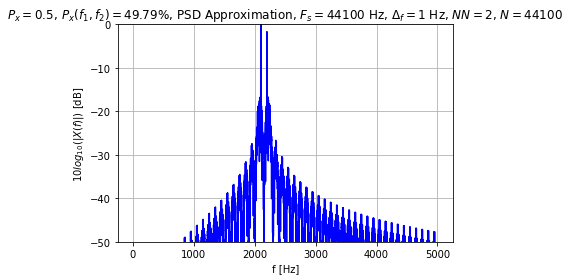

Banda stats:  (1546.0, 3054.0, 1508.0)
NÃO-COERENTE, M = 2


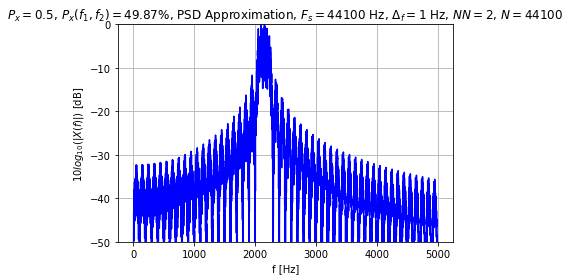

Banda stats:  (16.0, 4972.0, 4956.0)


In [109]:
generatorE2D(2)

COERENTE, M = 4


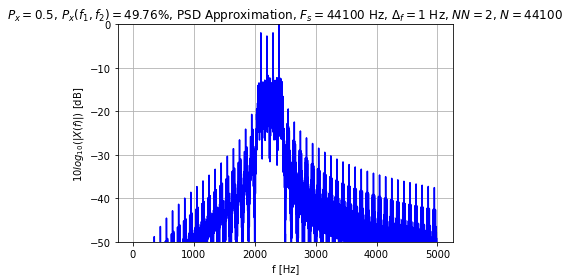

Banda stats:  (850.0, 4950.0, 4100.0)
NÃO-COERENTE, M = 4


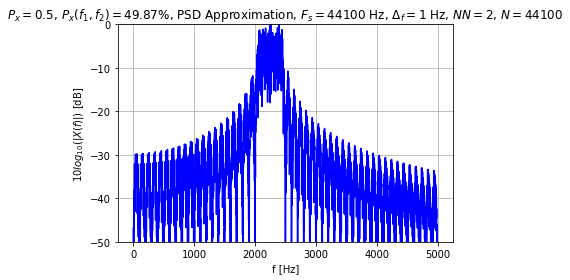

Banda stats:  (15.0, 4979.0, 4964.0)


In [110]:
generatorE2D(4)

A banda de -40dB:

Para M = 2:

<ul>
    <li> COERENTE: $\approx$ 1700 Hz
    <li> NÃO-COERENTE: $\approx$ 5000 Hz
<\ul>

Para M = 4:

<ul>
    <li> COERENTE: $\approx$ 3000 Hz
    <li> NÃO-COERENTE: $\approx$ 5000 Hz
<\ul>

## e

### fsksig801.wav

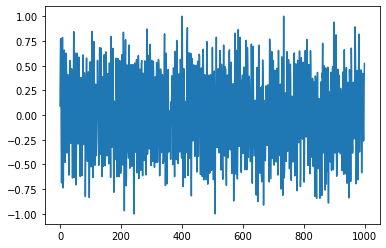

In [111]:
Fs, rt = ModuleLab1.wavread("Files/fsksig801.wav")
plt.plot(rt[:1000])

In [112]:
sig = comsig.sigWave(rt, Fs)

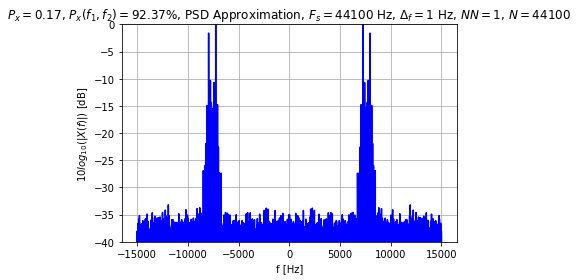

In [113]:
B = 15000
_ , _ = ModuleLab5.showpsd(sig, [-B, B, -40], Fs)

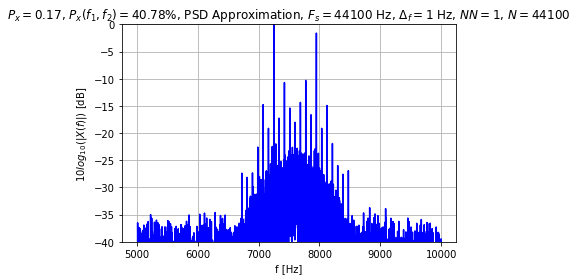

In [114]:
_ , _ = ModuleLab5.showpsd(sig, [5000, 10000, -40], Fs)

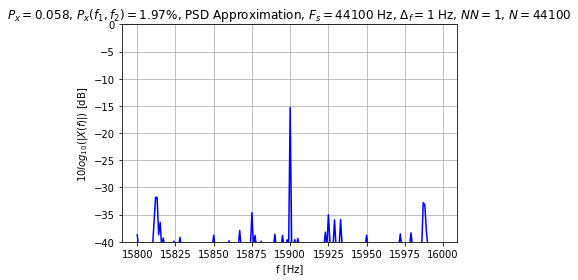

In [115]:
_ , _ = ModuleLab5.showpsd(sig.pwrx(2), [15800, 16000, -40], Fs)

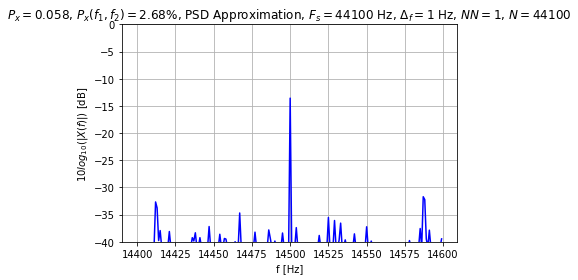

In [116]:
_ , _ = ModuleLab5.showpsd(sig.pwrx(2), [14400, 14600, -40], Fs)

In [117]:
f0 = 14500 / 2
f1 = 15900 / 2

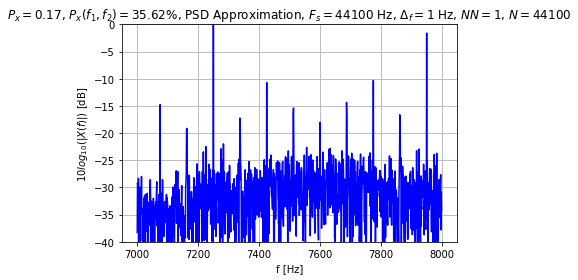

In [118]:
_ , _ = ModuleLab5.showpsd(sig, [7000, 8000, -40], Fs)

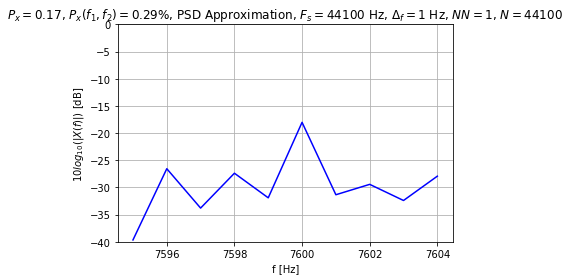

In [119]:
_ , _ = ModuleLab5.showpsd(sig, [7595, 7605, -40], Fs)

In [120]:
FB

100

In [121]:
for FB in np.arange(50, 1000, 50):
    try:
        sig_bn, sig_wt, ixn = ModuleLab8.fskrcvr(2, sig, 'noncoh', [f0, f1], [FB, 0.5], 'rect', [])
        ans = ModuleLab1.bin2asc(sig_bn.signal(), flg = 0)
        if ModuleLab1.check_sensible_string(ans):
            print(f"FB {FB}, ans = {ans}")
    except:
        pass

FB 700, ans = The first practical pair of roller skates was built by a Belgian musical instrument maker, Joseph Merlin, in 1759.


In [122]:
sig_bn, sig_wt, ixn = ModuleLab8.fskrcvr(2, sig, 'noncoh', [f0, f1], [700, 0.5], 'rect', [])
ans = ModuleLab1.bin2asc(sig_bn.signal(), flg = 0)
print(ans)

The first practical pair of roller skates was built by a Belgian musical instrument maker, Joseph Merlin, in 1759.


### fsksig802.wav

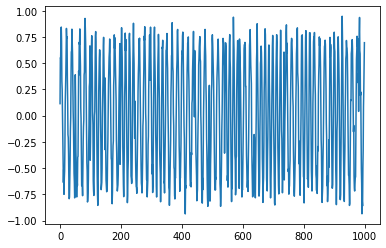

In [124]:
Fs, rt = ModuleLab1.wavread("Files/fsksig802.wav")
plt.plot(rt[:1000])

In [125]:
sig = comsig.sigWave(rt, Fs)

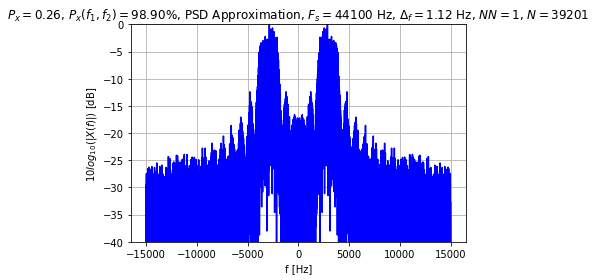

In [126]:
B = 15000
_ , _ = ModuleLab5.showpsd(sig, [-B, B, -40], Fs)

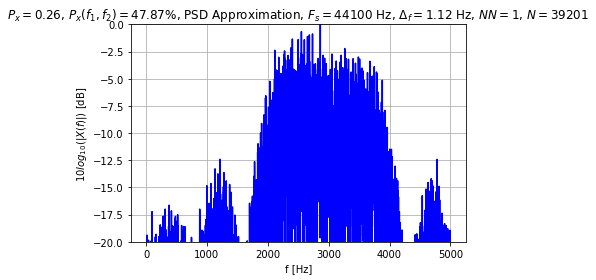

In [127]:
_ , _ = ModuleLab5.showpsd(sig, [0, 5000, -20], Fs)

In [129]:
for f0 in np.arange(1900, 3000, 200):
    for f1 in np.arange(f0, 4000, 200):
        for FB in np.arange(500, 1000, 100):
            try:
                sig_bn, sig_wt, ixn = ModuleLab8.fskrcvr(2, sig, 'noncoh', [f0, f1], [FB, 0.5], 'rect', [])
                ans = ModuleLab1.bin2asc(sig_bn.signal(), flg = 0)
                if ModuleLab1.check_sensible_string(ans):
                    print(f"FB {FB} f0 {f0} f1 {f1}, ans = {ans}")
            except:
                continue

FB 900 f0 1900 f1 3300, ans = The Barbie doll was named after Barbie Handler, a toy manufacturer born in 1917 in Denver, Colorado.
FB 900 f0 1900 f1 3500, ans = The Barbie doll was named after Barbie Handler, a toy manufacturer born in 1917 in Denver, Colorado.
FB 900 f0 1900 f1 3700, ans = The Barbie doll was named after Barbie Handler, a toy manufacturer born in 1917 in Denver, Colorado.
FB 900 f0 1900 f1 3900, ans = The Barbie doll was named after Barbie Handler, a toy manufacturer born in 1917 in Denver, Colorado.
FB 900 f0 2100 f1 3100, ans = The Barbie doll was named after Barbie Handler, a toy manufacturer born in 1917 in Denver, Colorado.
FB 900 f0 2100 f1 3300, ans = The Barbie doll was named after Barbie Handler, a toy manufacturer born in 1917 in Denver, Colorado.
FB 900 f0 2100 f1 3500, ans = The Barbie doll was named after Barbie Handler, a toy manufacturer born in 1917 in Denver, Colorado.
FB 900 f0 2100 f1 3700, ans = The Barbie doll was named after Barbie Handler, a toy